# Agrima's Export Model with ATP Synthase
---

In [12]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()
from bokeh.layouts import row

Loading BokehJS ...

In [ ]:
import colorcet
palette = colorcet.b_glasbey_category10

In [34]:
# Import statements
from subsbml import createNewSubsystem, createSubsystem

import numpy as np
import pylab as plt
# Import SBML models by creating Subsystem class objects
ss1_1 = createSubsystem('transporter.xml', subsystemName = 'virE2')
ss2_1 = createSubsystem('../rheostat_with_ayush/ATP_SYNTHASE.xml', subsystemName = 'atp_synthase')
#ss2 = createSubsystem('atp_rheostat_SLOW.xml', subsystemName = 'ATP_rheostat')

# ss1_atpsyn_txtl = createSubsystem('../rheostat_with_ayush/atpsynthase_machinery_txtl.xml', subsystemName = 'atpsyn_txtl')
# ss2_atpsyn_mi = createSubsystem('../rheostat_with_ayush/atpsynthase_membrane_integration.xml', subsystemName = 'atpsyn_mi')
# ss3_atpsynthesis = createSubsystem('../rheostat_with_ayush/atp_synthesis_through_atpsynthase.xml', subsystemName = 'atpsynthesis')
# #ss4_atp_use = createSubsystem('atp_use.xml', subsystemName = 'atp_use')
# #ss5_pp_txtl = createSubsystem('proton_pump_tx_tl.xml', subsystemName = 'pp_txtl')
# ss5_pp_txtl = createSubsystem('../rheostat_with_ayush/proton_pump_machinery_txtl.xml', subsystemName = 'pp_txtl')
# ss6_pp_mi = createSubsystem('../rheostat_with_ayush/proton_pump_membrane_integration.xml', subsystemName = 'pp_mi')
# ss7_protontransport = createSubsystem('../rheostat_with_ayush/proton_transport_through_proton_pump.xml', subsystemName = 'protontransport')

# entire_atp_subsystem = ss1_atpsyn_txtl + ss2_atpsyn_mi + ss3_atpsynthesis + ss5_pp_txtl + ss6_pp_mi + ss7_protontransport

#ss2 = createSubsystem('atp_rheostat_2_secs.xml', subsystemName = 'ATP_rheostat')


ss1_1.renameSName('ATP', 'metabolite_atp')
ss1_1.renameSName('P','metabolite_pi')


# ss2.renameSName('metabolite_adp', 'ADP')
# ss2.renameSName('metabolite_pi', 'P')


combsub = createNewSubsystem()
# combsub.combineSubsystems([ss1,ss1_atpsyn_txtl, ss2_atpsyn_mi, 
#                            ss3_atpsynthesis, ss5_pp_txtl, ss7_protontransport, ss7_protontransport])
combsub.combineSubsystems([ss1_1,ss2_1])

# Set signal concentration (input) - manually and get ID for protein X
_ = combsub.writeSBML('combintsub_ATPSYNTHASE.xml')




In [35]:
combsub.setSpeciesAmount('metabolite_atp', 10)

True

**Check atp subsystem**

In [36]:
#ss1.setSpeciesAmount('atc_e', 1e4)

spec_list_10 = ['dna_proton_pump', 'dna_atpsyn','proton_outside_H', 'metabolite_atp','protein_RNAP_machinery', 
                'protein_Ribo_machinery', 'protein_RNAse_machinery']
for i,spec in enumerate(spec_list_10):
    combsub.setSpeciesAmount(spec,10)
    
results_2, _ = combsub.simulateWithBioscrape(timepoints)

odeint failed with mxstep=500...

In [37]:
ATP_id_1 = combsub.getSpeciesByName('metabolite_atp').getId()

In [38]:
p_test = bokeh.plotting.figure(width = 450, height = 300)
p_test.line(timepoints, results_2[ATP_id_1])
bokeh.io.show(p_test)

In [45]:
from subsbml import System, createSubsystem, combineSystems, createNewSubsystem

import numpy as np
import pylab as plt

ss1 = createSubsystem('combintsub_SLOW.xml') #ATPSYNTHASE
ATP_id_1 = ss1.getSpeciesByName('metabolite_atp').getId()
#ATP_id_1 = ss1.getSpeciesByName('metabolite_atp').getId()




ss2 = createSubsystem('atc_external_reservoir.xml')

# Create a simple atc membrane where atc goes in an out of the membrane via a reversible reaction
mb1 = createSubsystem('membrane_atc.xml', membrane = True)

mb2 = createSubsystem('dnaexp_membrane1.xml', membrane = True)

cell_1 =  System('cell_1',ListOfInternalSubsystems = [ss1],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb1, mb2])

cell_1_model = cell_1.getModel()

spec_list_10 = ['dna_proton_pump', 'dna_atpsyn','proton_outside_H','protein_RNAP_machinery', 
                'protein_Ribo_machinery', 'protein_RNAse_machinery']
for i,spec in enumerate(spec_list_10):
    cell_1_model.setSpeciesAmount(spec,10)
    
cell_1_model.setSpeciesAmount('atc_e', 1e4, compartment = 'cell_1_external')
cell_1_model.setSpeciesAmount('ssDNA', 50, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('dna_g', 1, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('tetR', 10, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('ATP', 10, compartment = 'cell_1_internal') # metabolite_atp
cell_1_model.setSpeciesAmount('molecule_glucose', 30, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('metabolite_nadp', 30, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('P', 30, compartment = 'cell_1_internal') # metabolite_pi
cell_1_model.setSpeciesAmount('enzyme_hex', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_pgi', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_pfk', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_ald_tpi', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_gapN', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_mGapDH', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_pgk', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_pgm', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_eno', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_pyk', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_alsS', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_IlvC', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_IlvD', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_kivD', 0.20, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('enzyme_yahk', 0.20, compartment = 'cell_1_internal')

cell_1_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-4) 

cell_1_model.writeSBML('cell_1_model.xml')

ValueError: The species metabolite_atp not found.

In [42]:
timepoints = np.linspace(0,50000,200)
results_1, _ = cell_1_model.simulateWithBioscrape(timepoints)

VirE2_b_id1 = cell_1_model.getSpeciesByName('VirE2_b', compartment = 'cell_1_internal').getId()
ssDNA_e_id1 = cell_1_model.getSpeciesByName('ssDNA_e', compartment = 'cell_1_external').getId()
ssDNA_id1 = cell_1_model.getSpeciesByName('ssDNA', compartment = 'cell_1_internal').getId()
VirE2_b_ssDNA_id1 = cell_1_model.getSpeciesByName('VirE2_b_ssDNA', compartment = 'cell_1_internal').getId()
ATP_id1 = cell_1_model.getSpeciesByName('metabolite_atp', compartment = 'cell_1_internal').getId()


p = bokeh.plotting.figure(width= 480, height = 400, title = 'With ATP Synthase',
                         y_axis_label = 'Concentration (nM)',
                         x_axis_label = 'Time (hrs)')

p.line(timepoints/60/60, results_1[VirE2_b_id1], line_width = 3, legend_label = 'VirE2 Bound',
      color = palette[0])
p.line(timepoints/60/60, results_1[ssDNA_e_id1], line_width = 3, legend_label = 'ssDNA exported',
      color = palette[1])
p.line(timepoints/60/60, results_1[ssDNA_id1], line_width = 3, legend_label = 'ssDNA inside',
      color = palette[2])

p.line(timepoints/60/60, results_1[ATP_id1], line_width = 3, legend_label = 'ATP',
      color = palette[4])

p.legend.location = 'center_right'
bokeh.io.show(p)

# plt.figure(figsize=(12,6))
# plt.plot(timepoints, results_1[VirE2_b_id1], linewidth = 3, label = 'VirE2_b_1')
# plt.plot(timepoints, results_1[ssDNA_e_id1], linewidth = 4, label = 'ssDNA_e_1')
# #plt.plot(timepoints, results_1[VirE2_b_ssDNA_id1], linewidth = 3, label = 'ssDNA_bound_1')
# plt.plot(timepoints, results_1[ssDNA_id1], linewidth = 3, label = 'ssDNA_i_1')
# plt.plot(timepoints, results_1[ATP_id1], linewidth = 4, label = 'ATP_1')


# 
# plt.title("ATP conc: model 1=40")
# plt.xlabel('Time')
# plt.ylabel('Conc')
# plt.legend()
# plt.show()

odeint failed with mxstep=500...

/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:93: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+
/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:208: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


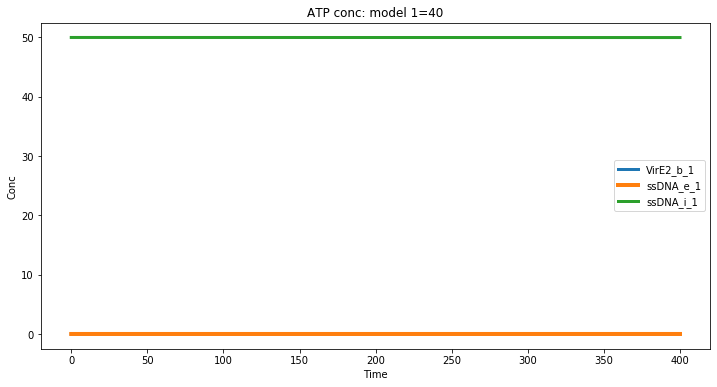

In [8]:
timepoints = np.linspace(0,400,10000)
results_1, _ = cell_1_model.simulateWithBioscrape(timepoints)

VirE2_b_id1 = cell_1_model.getSpeciesByName('VirE2_b', compartment = 'cell_1_internal').getId()
ssDNA_e_id1 = cell_1_model.getSpeciesByName('ssDNA_e', compartment = 'cell_1_external').getId()
ssDNA_id1 = cell_1_model.getSpeciesByName('ssDNA', compartment = 'cell_1_internal').getId()
VirE2_b_ssDNA_id1 = cell_1_model.getSpeciesByName('VirE2_b_ssDNA', compartment = 'cell_1_internal').getId()

plt.figure(figsize=(12,6))
plt.plot(timepoints, results_1[VirE2_b_id1], linewidth = 3, label = 'VirE2_b_1')
plt.plot(timepoints, results_1[ssDNA_e_id1], linewidth = 4, label = 'ssDNA_e_1')
#plt.plot(timepoints, results_1[VirE2_b_ssDNA_id1], linewidth = 3, label = 'ssDNA_bound_1')
plt.plot(timepoints, results_1[ssDNA_id1], linewidth = 3, label = 'ssDNA_i_1')

plt.title("ATP conc: model 1=40")
plt.xlabel('Time')
plt.ylabel('Conc')
plt.legend()
plt.show()

### CHeck atp subsystem

In [43]:
#ss1.setSpeciesAmount('atc_e', 1e4)

spec_list_10 = ['dna_proton_pump', 'dna_atpsyn','proton_outside_H', 'metabolite_atp','protein_RNAP_machinery', 
                'protein_Ribo_machinery', 'protein_RNAse_machinery']
for i,spec in enumerate(spec_list_10):
    ss1.setSpeciesAmount(spec,10)
    
results_2, _ = ss1.simulateWithBioscrape(timepoints)

odeint failed with mxstep=500...

## No atp synthase
---

In [9]:
from subsbml import System, createSubsystem, combineSystems, createNewSubsystem

import numpy as np
import pylab as plt

ss1 = createSubsystem('transporter.xml')
ss2 = createSubsystem('atc_external_reservoir.xml')

# Create a simple atc membrane where atc goes in an out of the membrane via a reversible reaction
mb1 = createSubsystem('membrane_atc.xml', membrane = True)

mb2 = createSubsystem('dnaexp_membrane1.xml', membrane = True)

cell_2 =  System('cell_2',ListOfInternalSubsystems = [ss1],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb1, mb2])

cell_2_model = cell_2.getModel()
cell_2_model.setSpeciesAmount('atc_e', 1e4, compartment = 'cell_2_external')
cell_2_model.setSpeciesAmount('ssDNA', 50, compartment = 'cell_2_internal')
cell_2_model.setSpeciesAmount('dna_g', 1, compartment = 'cell_2_internal')
cell_2_model.setSpeciesAmount('tetR', 10, compartment = 'cell_2_internal')
cell_2_model.setSpeciesAmount('ATP', 10, compartment = 'cell_2_internal')
cell_2_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-4) 

cell_2_model.writeSBML('cell_2_model.xml')




The subsystem from membrane_atc.xml has multiple compartments
The subsystem from dnaexp_membrane1.xml has multiple compartments


1

In [10]:
timepoints = np.linspace(0,50000,200)
results_2, _ = cell_2_model.simulateWithBioscrape(timepoints)

VirE2_b_id2 = cell_2_model.getSpeciesByName('VirE2_b', compartment = 'cell_2_internal').getId()
ssDNA_e_id2 = cell_2_model.getSpeciesByName('ssDNA_e', compartment = 'cell_2_external').getId()
ssDNA_id2 = cell_2_model.getSpeciesByName('ssDNA', compartment = 'cell_2_internal').getId()
VirE2_b_ssDNA_id2 = cell_2_model.getSpeciesByName('VirE2_b_ssDNA', compartment = 'cell_2_internal').getId()
ATP_id2 = cell_2_model.getSpeciesByName('ATP', compartment = 'cell_2_internal').getId()
rna_id2 = cell_2_model.getSpeciesByName('rna_g', compartment = 'cell_2_internal').getId()




p1 = bokeh.plotting.figure(width=480, height = 400, title = 'Without Rheostat',
                         y_axis_label = 'Concentration (mM)',
                         x_axis_label = 'Time (hrs)')

p1.line(timepoints/60/60, results_2[VirE2_b_id2], line_width = 3, legend_label = 'VirE2 Bound',
      color = palette[0])
p1.line(timepoints/60/60, results_2[ssDNA_e_id2], line_width = 3, legend_label = 'ssDNA exported',
      color = palette[1])
p1.line(timepoints/60/60, results_2[ssDNA_id2], line_width = 3, legend_label = 'ssDNA inside',
      color = palette[2])

p1.line(timepoints/60/60, results_2[ATP_id2], line_width = 3, legend_label = 'ATP',
      color = palette[4])

p1.legend.location = 'center_right'
bokeh.io.show(p1)


# plt.figure(figsize=(12,6))

# plt.plot(timepoints, results_2[VirE2_b_id2], linewidth = 3, label = 'VirE2_b_2')
# plt.plot(timepoints, results_2[ssDNA_e_id2], linewidth =2, label = 'ssDNA_e_2')
# plt.plot(timepoints, results_2[ATP_id2], 'brown', linewidth = 4, label = 'ATP_2')
# plt.plot(timepoints, results_2[VirE2_b_ssDNA_id2], linewidth = 3, label = 'ssDNA_bound_2')
# plt.plot(timepoints, results_2[ssDNA_id2], linewidth = 3, label = 'ssDNA_i_2')
# #plt.plot(timepoints, results_2[rna_id2], linewidth = 3, label = 'rna')


# #plt.title("ATP conc: model 2=5")
# #plt.xlabel('Time')
# #plt.ylabel('Conc')
# #plt.legend()
# #plt.show()

/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:93: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+
/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:208: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


In [13]:
bokeh.io.show(row(p,p1))